<a href="https://colab.research.google.com/github/fitriademiar/Study-Independen/blob/main/SL_NLP_4_Self_Learning_Sentiment_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PENTING DAN MOHON PERHATIAN

Pada Preprocessing kode ini menggunakan 2 STOPWORDS, yaitu Stopwords bahasa Indonesia dan Stopwords bahasa Inggris.

Langkah-langkah mengerjakan:
1. Run Preprocessing kode menggunakan stopwords Bahasa Indonesia terlebih dahulu, run sampai selesai

2. Run Preprocessing kode menggunakan stopwords Bahasa Inggris, dan run sampai selesai

Istilah korpus (corpus) digunakan untuk menjelaskan sekumpulan dokumen, baik
berbentuk tulisan atau lisan, yang disimpan dan diproses di dalam komputer untuk
tujuan penyelidikan dan penelitian. Tujuan pembuatan korpus antara
lain sebagai data training untuk aplikasi NLP (part-of-speech taggers dan parsers,
speech recognizers, sistem terjemahan), sumber data untuk penelitian leksikal, optimasi
mesin pencarian, studi literatur, dan kebutuhan khusus lainnya

# **KETIK ULANG CODINGAN DIBAWAH INI dan Jelaskan fungsi-fungsi dicodingan tersebut**


# Analisa Sentimen menggunakan Algoritma Logistic Regression

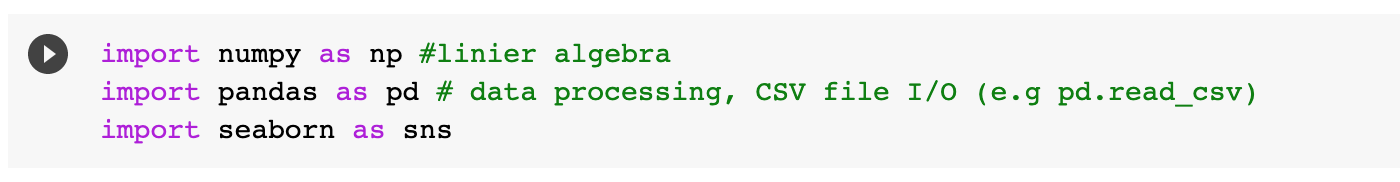

In [1]:
import numpy as np #linier algebra
import pandas as pd #data prepocessing, CSV file I/O (e.g pd.read_csv)
import seaborn as sns

# Proses 1 (Input Data Training)

In [4]:
#membaca data training = 1050 data
df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


In [6]:
print(df.columns)

Index(['label', 'tweet'], dtype='object')


In [13]:
#menampilkan data label
y = df['label']
y[0:5]

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

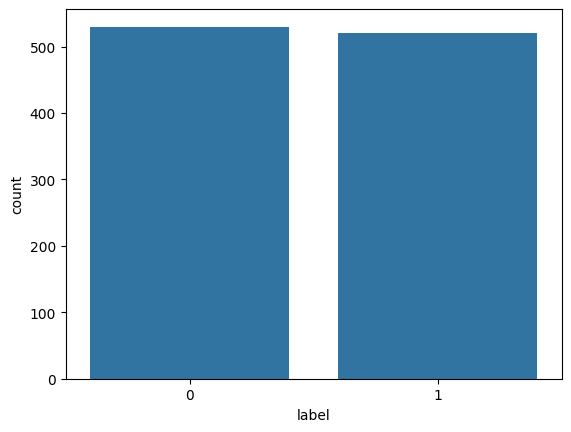

In [14]:
#menampilkan grafik nilai dari variabel "label"
sns.countplot(x='label', data=df)

In [15]:
#menghitung jumlah data masing-masing label
df["label"].value_counts()

label
0    530
1    520
Name: count, dtype: int64

# Proses 2 (preprocessing, case folding, stopword removal, steming )

# Preprocessing

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

# 1. Preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

In [21]:
#simpan kata-kata stopword

f=open('stopwordlist.txt')
ina_stopword = f.read()

tempStoplist = []
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

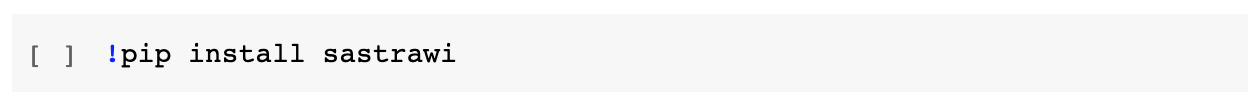

In [22]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [23]:
tempStoplist

[]

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [27]:
TEXT_CLEANING_RE = "@=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"

def preprocessing(tweet):
  tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip() #casefolding dan remove punctuation
  tokens = []
  for token in tweet.split():
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token)
      tokens.append(token)
    return" ".join(tokens)

# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

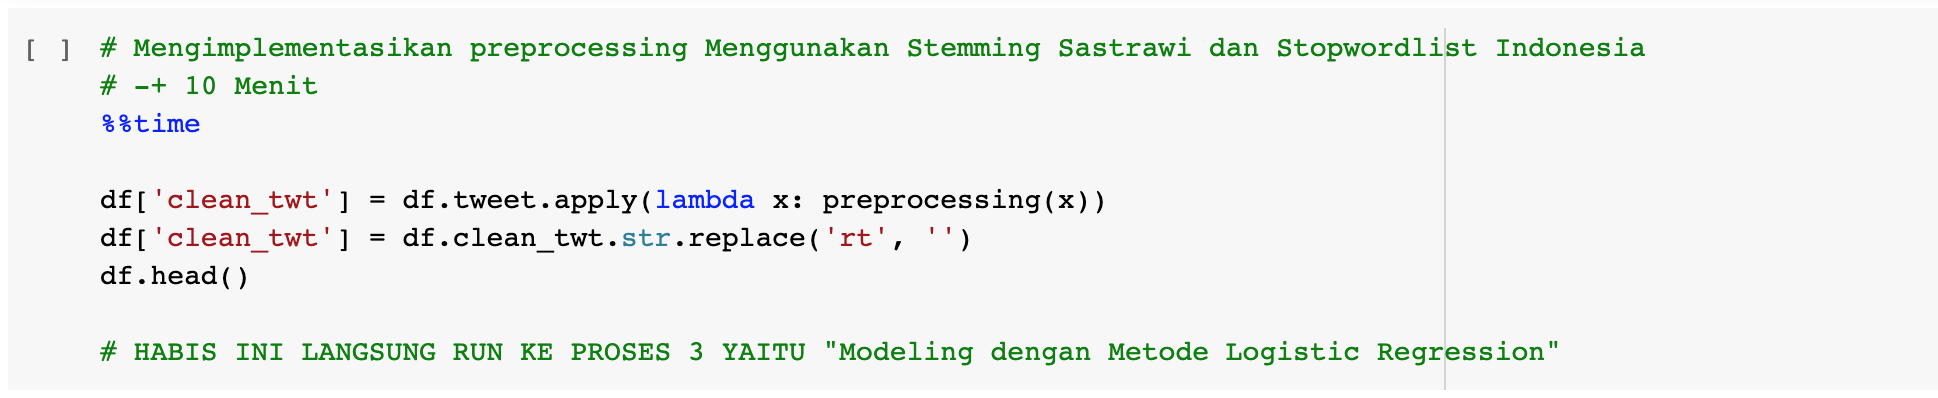

In [30]:
#Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia
#-+ 10 menit

%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()


CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
Wall time: 57.3 ms


,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,
1,1,rt @pandji nah gue pikir sentimen petahana ok...,
2,1,rt @pandji urutan pertama best moment #debat ...,
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,
4,0,rt @mrtampi agus makin santai nahok makin sa...,


Nahh, disini dalam proses preprocessing memakan waktu yang lama, yaitu sekitar 5 menit.

# 2. Preprocessing Menggunakan Stemming English dan Stopwordlist English

In [31]:
nltk.download('stopwords')

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
def preprocess(tweet, stem=False):
    tweet = re.sub(TEXT_CLEANING_RE, '', str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in tempStoplist:
            if stem:
                tokens.append(stem(token))
            else:
                tokens.append(token)

    return " ".join(tokens)


Mengimplementasikan preprocessing dengan Menggunakan Stemming English dan Stopwordlist English

In [46]:
#Mengimplementasikan preprocessing dengan menggunakan stemming english dan stopwordlist english

%%time


df['clean_twt'] = df.tweet.apply(lambda x: preprocess(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()


CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 14.3 ms


,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,@napqilla no ambisinya menguasai rakyat no am...
1,1,rt @pandji nah gue pikir sentimen petahana ok...,@pandji nah gue pikir sentimen petahana oke d...
2,1,rt @pandji urutan pertama best moment #debat ...,@pandji urutan peama best moment #debat pilka...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,@pandji ini aikel yg menjelaskan ternyata di ...
4,0,rt @mrtampi agus makin santai nahok makin sa...,@mampi agus makin santai nahok makin santun n...


Dan, disini dengan menggunakan stopwords bahasa Inggris waktu preprocessing

# Proses 3 (Modeling dengan Metode Logistic Regression)

# Logistic Regression

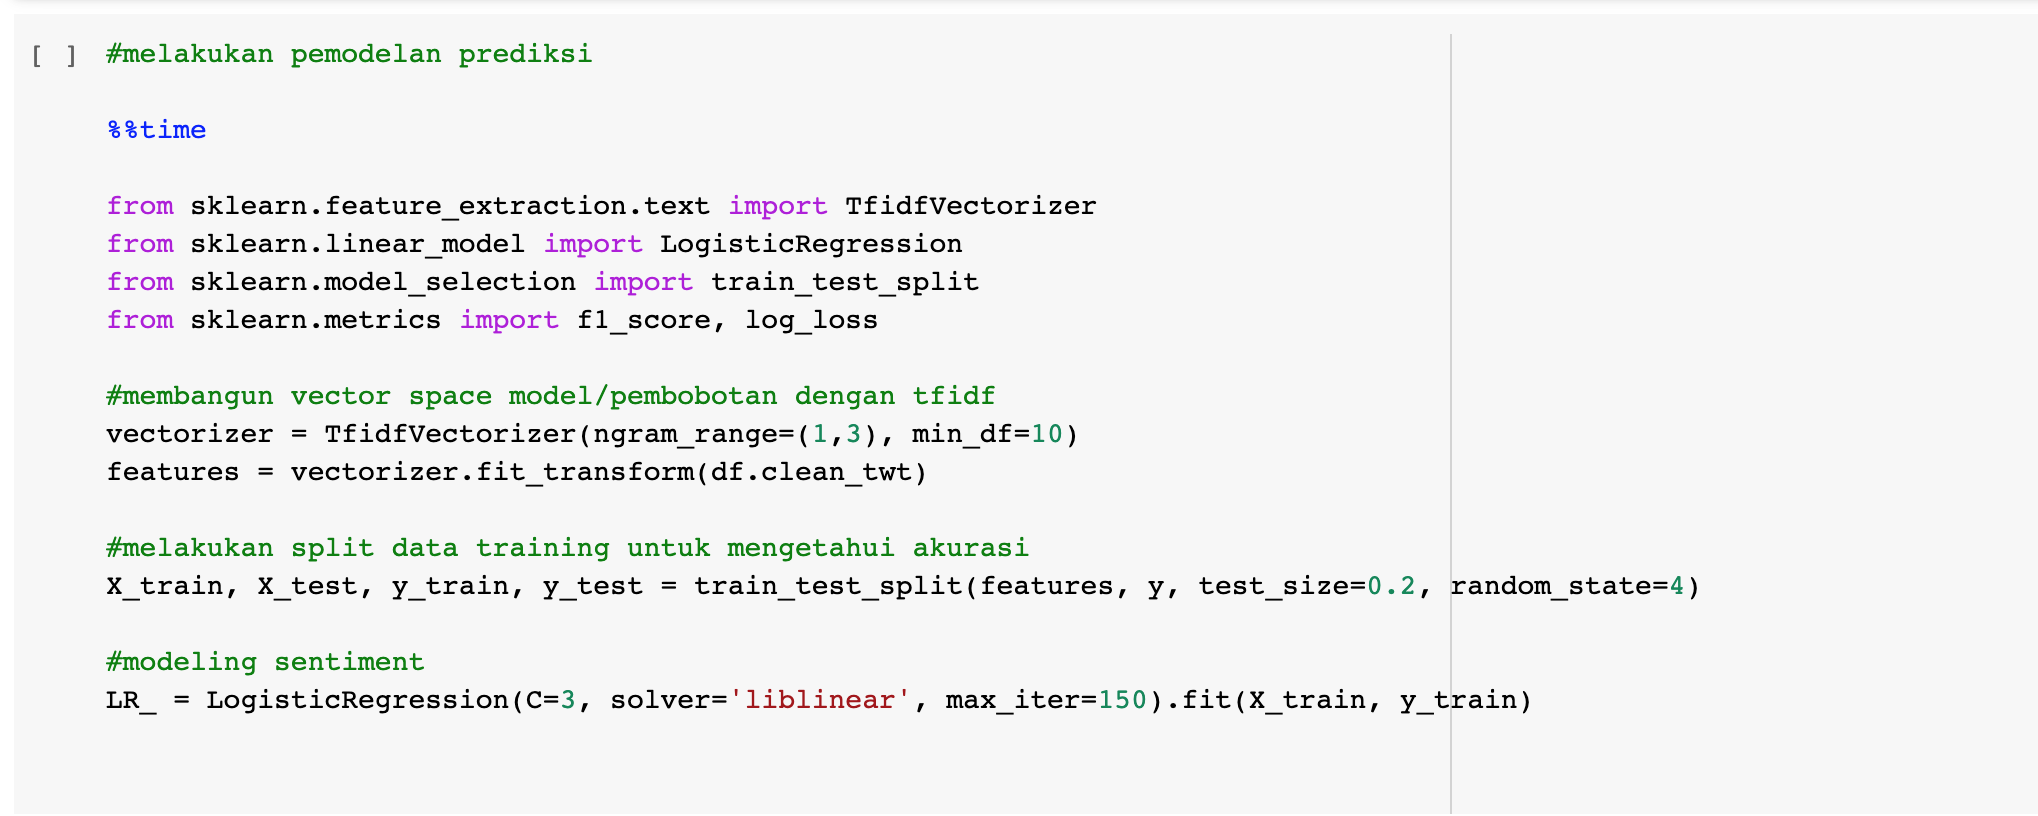

In [53]:
#melakukan pemodelan prediksi

%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df = 10)
features = vectorizer.fit_transform(df.clean_twt)

#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)

#modelling sentiment
LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)

CPU times: user 122 ms, sys: 626 µs, total: 123 ms
Wall time: 195 ms


In [54]:
features

<1050x820 sparse matrix of type '<class 'numpy.float64'>'
	with 18990 stored elements in Compressed Sparse Row format>

# Proses 4 (Evaluation)

# Evaluation

In [55]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
print('F1 score :', f1_score(y_test, yhat, average = 'weighted'))

yhat_prob = LR_.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, yhat_prob))

F1 score : 0.7576140369183211
Log Loss:  0.4953859147255133


# Proses 5 (End Process : Prediction of Data Testing)

# Testing Prediksi

# Prediction

In [56]:
#Melakukan prediksi untuk data yang tidak diketahui labelnya
#lakukan prepocessing untuk data yang tidak diketahui labelnya
#df_test = pd.read_csv('juli2test.csv')

df_test = pd.read_csv(r'https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2test.csv')
df_test.head()

,tweet
0,soal quran polisi harus cari saksi yang den...
1,wajar rachmawati tersinggung megawati bawa ...
2,rt @l n chirpified mengapa anies b gaga...
3,rt @sibonekakayu kegaduhan yg diciptakan ah...
4,vivacoid ini video saat nusron wahid kritik...


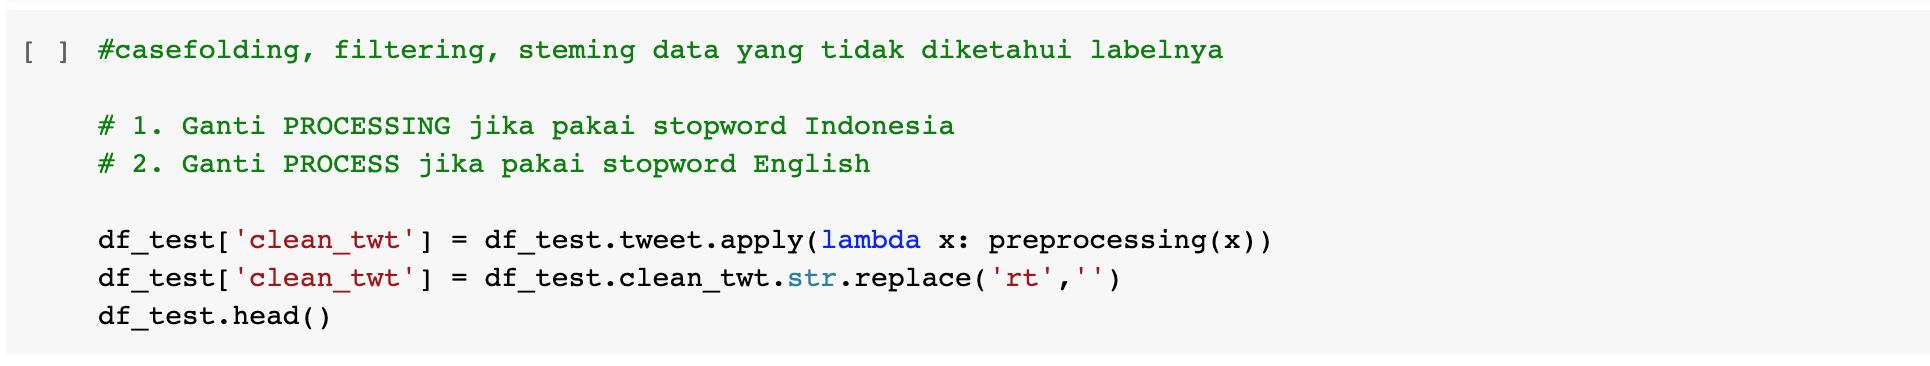

In [58]:
#casefolding, filtering, steming data yang tidak diketahui labelnya
#1. Ganti PROCESSING jika pakai stopword Indonesia
#2. Ganti PROCESS jika pakai stopword English

df_test['clean_twt'] = df_test.tweet.apply(lambda x: preprocessing(x))
df_test['clean_twt'] = df_test.clean_twt.str.replace('rt', ' ')
df_test.head()

,tweet,clean_twt
0,soal quran polisi harus cari saksi yang den...,soal
1,wajar rachmawati tersinggung megawati bawa ...,wajar
2,rt @l n chirpified mengapa anies b gaga...,
3,rt @sibonekakayu kegaduhan yg diciptakan ah...,
4,vivacoid ini video saat nusron wahid kritik...,vivacoid


In [61]:
#pembobotan data yang tidak diketahui labelnya
vector_test = TfidfVectorizer(ngram_range=(1,3), min_df=10)
feature_test = vector_test.fit_transform(df_test.clean_twt)

In [62]:
#melakukan training yang tidak diketahui labelnya
def training_step(data, vectorizer) :
  features = vectorizer.fit_transform(df.clean_twt)
  LR_ = LogisticRegression(C=3, solver='liblinear', max_iter = 150).fit(features,y)
  return LR_

#melakukan testing
classifier = training_step(df.clean_twt, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_twt))

result

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
#simpan hasil
np.savetxt('hasil_prediksi_juli.txt', result, fmt='%i', delimiter='\n')

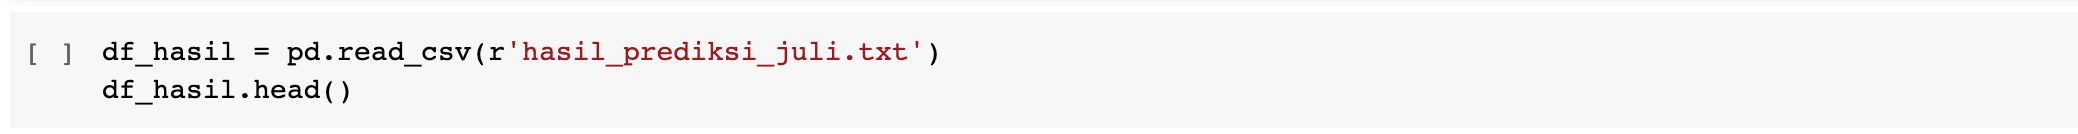

In [65]:
df_hasil = pd.read_csv(r'hasil_prediksi_juli.txt')
df_hasil.head()

,1
0,0
1,0
2,0
3,0
4,0


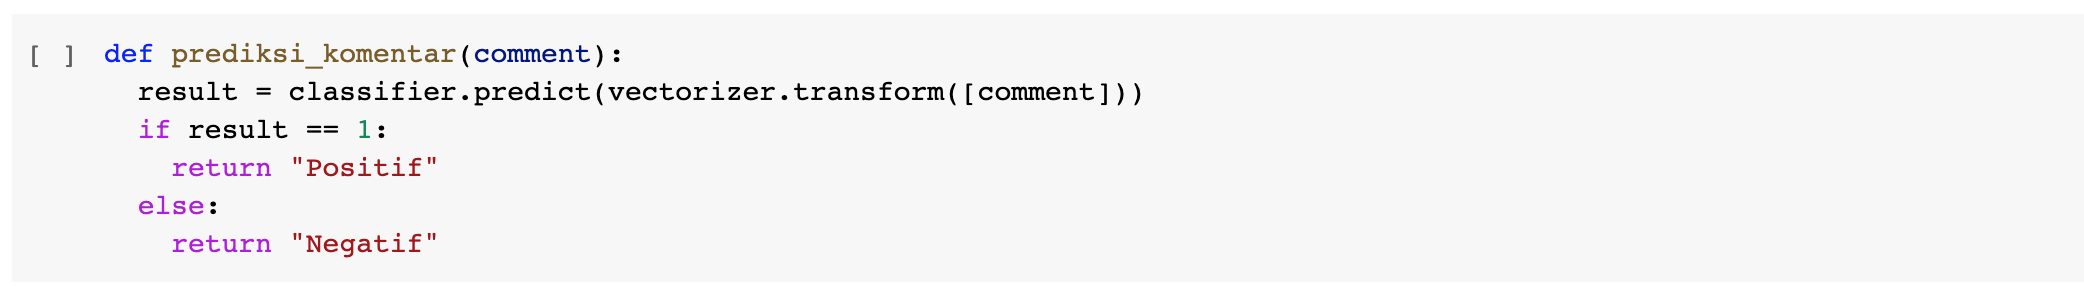

In [66]:
def prediksi_komentar(comment):
  result = classifier.predict(vectorizer.transform([comment]))
  if result ==1:
    return "Positif"
  else:
    return "Negatif"

In [67]:
prediksi_komentar("Wah ahok cocok jadi presiden nih")

'Positif'